.

Comprendre l'utilisation et l'importance des ACP (Analyses en Composantes Partielles) avec scikit-learn est l'objet de cet application. Je m'exerce à comprendre l'impact de la distribution des données sur les résultats de l'ACP.    
.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sb


Nous allons commencer par génerer un ensemble de données dans une espace 3D.


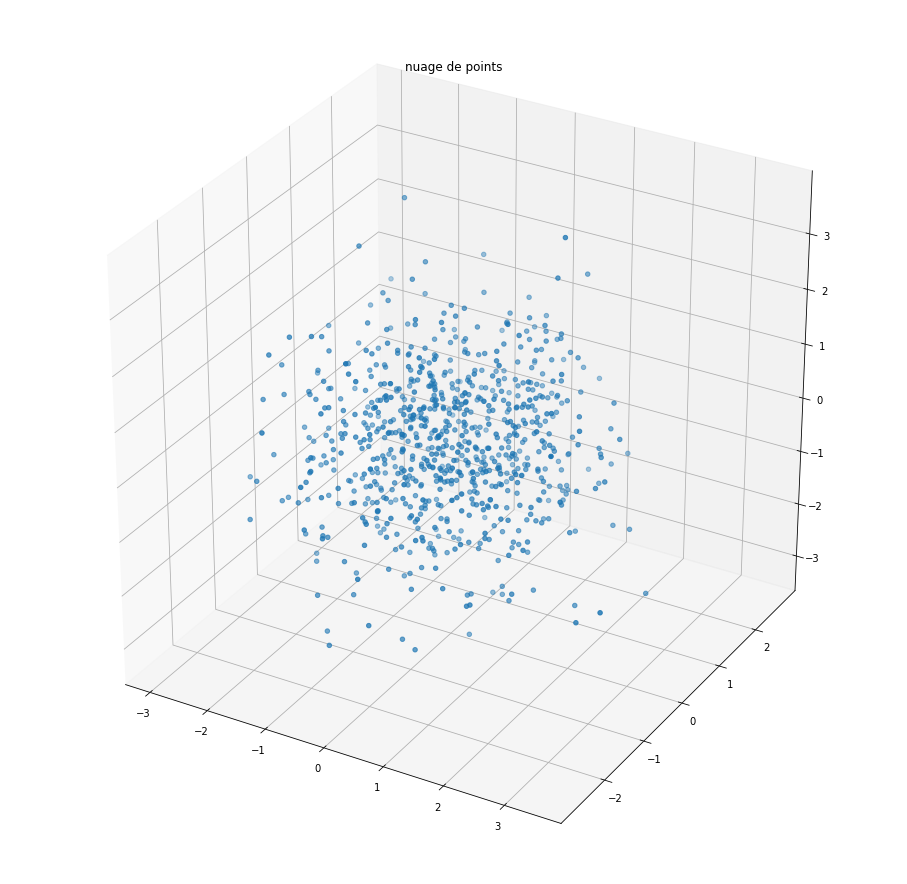

In [2]:
gen_data = np.random.randn (800, 3)# Randn => échantillon à partir d'une distribution normale (centrée et réduite)

fig = plt.figure(figsize= (16, 16))
ax = fig.add_subplot (111, projection = '3d')
ax.scatter (gen_data[:,0], gen_data[:,1], gen_data[:,2])
plt.title ("nuage de points")
plt.show()

Etant donnée que l'ACP (analyse multivariée) prend ses valeurs entre 0 et 1, nous pouvons l'appliquer ici après avoir représenté notre nuage de points. 

In [3]:
a = PCA()
a.get_params().keys()

dict_keys(['copy', 'iterated_power', 'n_components', 'random_state', 'svd_solver', 'tol', 'whiten'])

In [4]:
pca = PCA (n_components = 3)
pca.fit(gen_data)

print ("le % de variance expliquée est de ", pca.explained_variance_ratio_, "\n")
print ("composantes principales \n", pca.components_)

le % de variance expliquée est de  [0.35902296 0.32943716 0.31153989] 

composantes principales 
 [[ 0.62885093  0.10961478 -0.76976042]
 [ 0.715614    0.30554017  0.62812563]
 [-0.30404458  0.94584872 -0.11369735]]


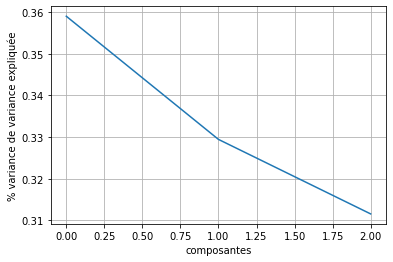

In [5]:
plt.xlabel ("composantes")
plt.ylabel ("% variance de variance expliquée")
plt.grid()
plt.plot(pca.explained_variance_ratio_)

La décroissance du graphe de la variance montre qu'il y'a une covariance négative. 

Générons un nouveau vecteur de données pour voir si' y'aura toujours le même phénomène qui sera observé c'est à dire un regroupement des valeurs propres

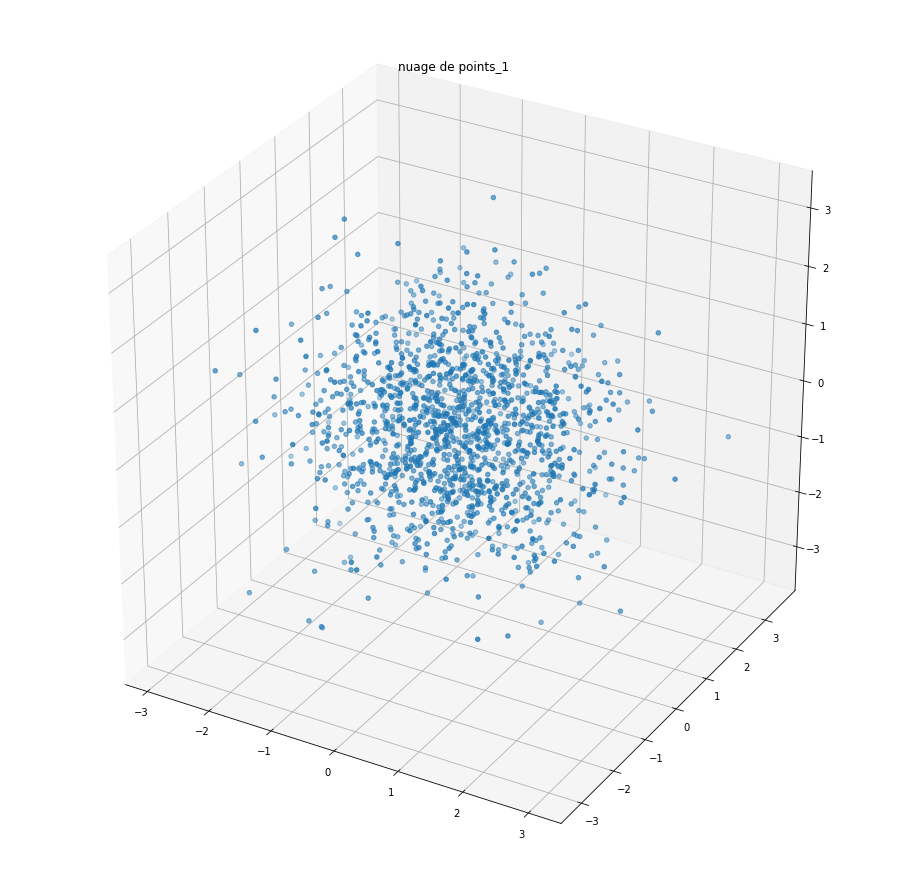

In [6]:
gen_data_1 = np.random.randn (1500, 3)

fig = plt.figure(figsize= (16, 16))
ax = fig.add_subplot (111, projection = '3d')
ax.scatter (gen_data_1[:,0], gen_data_1[:,1], gen_data_1[:,2])
plt.title ("nuage de points_1")
plt.show()

In [7]:
pca_1 = PCA (n_components = 3)
pca_1.fit(gen_data_1)

print ("le % de variance expliquée est de ", pca_1.explained_variance_ratio_, "\n")
print ("composantes principales \n", pca_1.components_)

le % de variance expliquée est de  [0.35399827 0.34057135 0.30543037] 

composantes principales 
 [[ 0.55618939  0.555007   -0.61856333]
 [-0.05822581 -0.71645722 -0.69519696]
 [ 0.82901334 -0.42267752  0.36617017]]


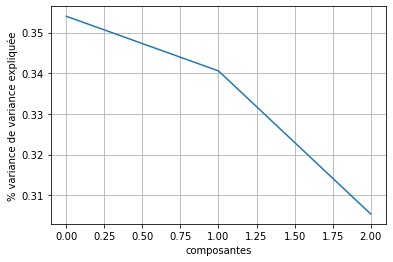

In [8]:
plt.xlabel ("composantes")
plt.ylabel ("% variance de variance expliquée")
plt.grid()
plt.plot(pca_1.explained_variance_ratio_)

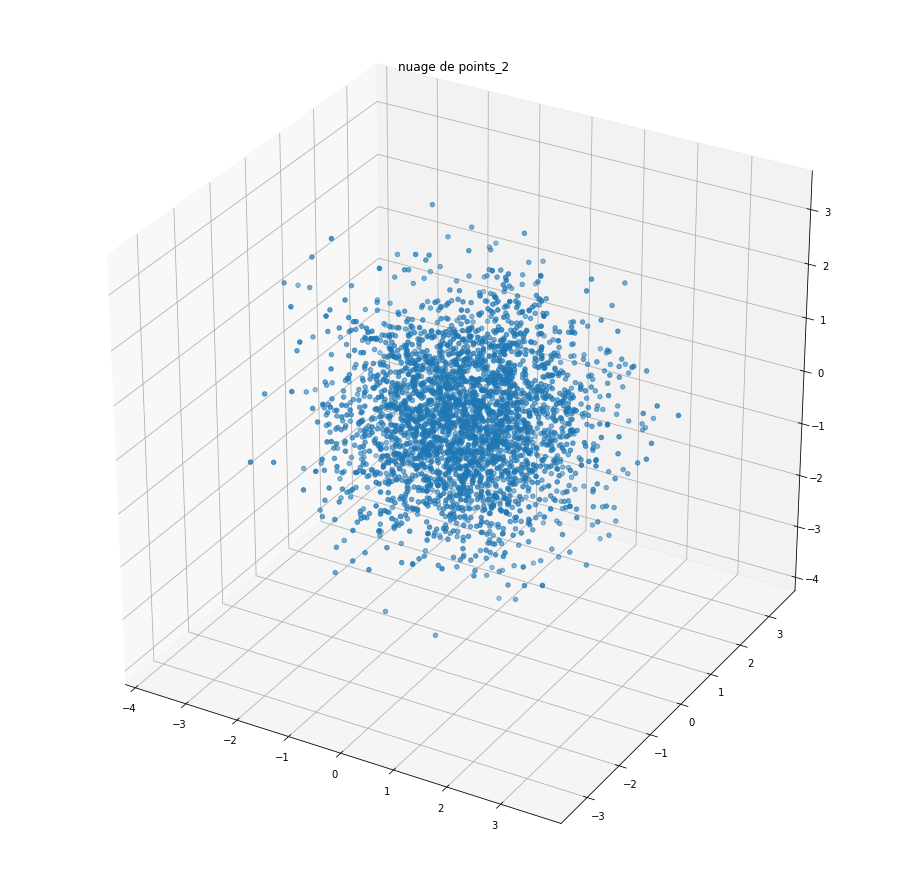

In [9]:
gen_data_2 = np.random.randn (3000, 3)# Randn => échantillon à partir d'une distribution normale (centrée et réduite)

fig = plt.figure(figsize= (16, 16))
ax = fig.add_subplot (111, projection = '3d')
ax.scatter (gen_data_2[:,0], gen_data_2[:,1], gen_data_2[:,2])
plt.title ("nuage de points_2")
plt.show()

On remarque que plus la base de données générées est élevée, plus les valeurs propres ont tendance à se      rapprocher entres elles.    
Il n'existe pas un grand changement par rapport à la base initiale la forme des nuages de point est toujours sphérique.

-

In [10]:
pca_2 = PCA (n_components = 3)
pca_2.fit(gen_data_2)

print ("le % de variance expliquée est de ", pca_2.explained_variance_ratio_, "\n")
print ("composantes principales \n", pca_2.components_)

le % de variance expliquée est de  [0.34817539 0.33200992 0.31981468] 

composantes principales 
 [[-0.70109001 -0.5797289   0.41519538]
 [-0.71294911  0.55904388 -0.42328891]
 [ 0.01328038 -0.5927768  -0.80525728]]


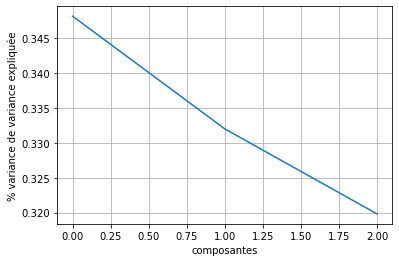

In [11]:
plt.xlabel ("composantes")
plt.ylabel ("% variance de variance expliquée")
plt.grid()
plt.plot(pca_2.explained_variance_ratio_)

.

        On remarque toujours une décroissance ce qui se traduit par une covariance négative. 

.

## Faisons le même principe sur le dataset iris    

.

In [12]:
from sklearn import datasets

In [13]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
#len (y_iris)

In [14]:
type (X_iris)

numpy.ndarray

In [15]:
X_iris[:4, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

Faisons une représentation à 2 dim pour voir la répartition des données

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

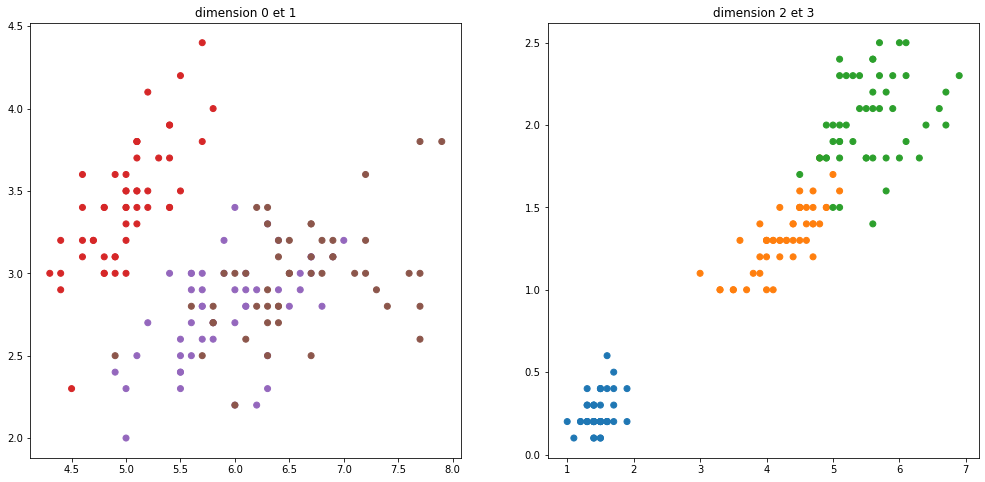

In [16]:
fig = plt.figure (figsize=(17, 8))

ax = plt.subplot (121)
plt.title ("dimension 0 et 1")
ax.scatter(X_iris[:, 0], X_iris[:, 1], c=np.array(['C3', 'C4', 'C5'])[y_iris])

ax = plt.subplot (122)
plt.title ("dimension 2 et 3")
ax.scatter(X_iris[:, 2], X_iris[:, 3], c=np.array(['C0', 'C1', 'C2'])[y_iris])
plt.plot


En se basant sur la figure de droite on voit bien que les dimensions sont correlées. une droite linéaire pourrait nous être utile dans ce cas pour faire une classification.

                  Faisons une représentation à 3D pour voir si le même phénomène sera toujours observé

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

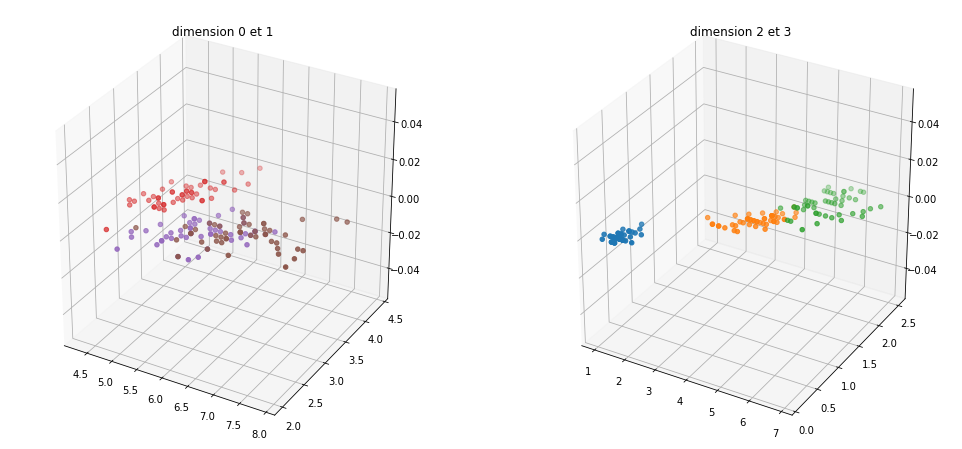

In [17]:
fig = plt.figure (figsize=(17, 8))

ax = plt.subplot (121, projection = "3d")
plt.title ("dimension 0 et 1")
ax.scatter(X_iris[:, 0], X_iris[:, 1], c=np.array(['C3', 'C4', 'C5'])[y_iris])


ax = plt.subplot (122, projection = "3d")
plt.title ("dimension 2 et 3")
ax.scatter(X_iris[:, 2], X_iris[:, 3], c=np.array(['C0', 'C1', 'C2'])[y_iris])

plt.plot

Le même phénomène se réalise toujours et est beaucoup plus claire, on voit une représentation des points sous la forme d'une droite dans l'espace.

                                Autre représentation avec des légendes

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

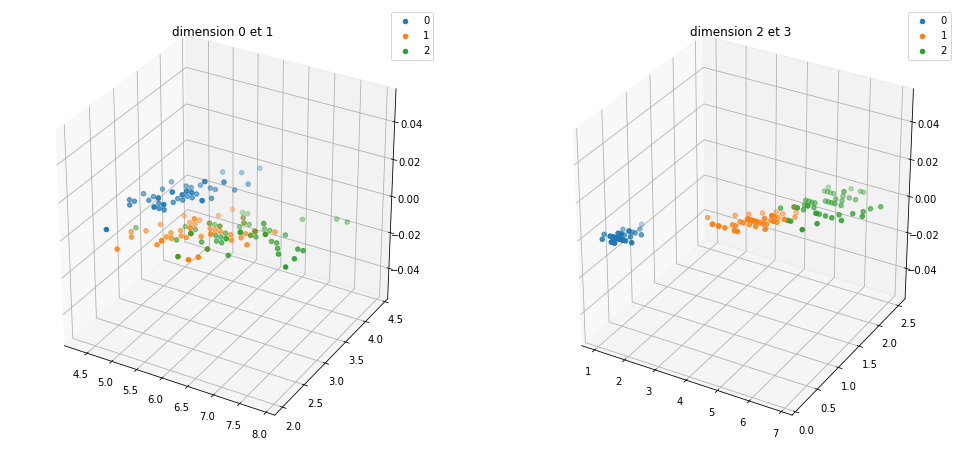

In [18]:
fig = plt.figure (figsize=(17, 8))

ax = plt.subplot (121, projection = "3d")
plt.title ("dimension 0 et 1")
for i in np.unique(y_iris): 
    mask = y_iris == i 
    ax.scatter(X_iris[mask, 0], X_iris[mask, 1], label=i) 
ax.legend()

ax = plt.subplot (122, projection = "3d")
plt.title ("dimension 2 et 3")
for a in np.unique(y_iris): 
    mask = y_iris == a 
    ax.scatter(X_iris[mask, 2], X_iris[mask, 3], label=a) 
ax.legend()

plt.plot